In [2]:
import pathlib

path_root = pathlib.Path('./')
path_imgs = pathlib.Path('./processed_images')

#Exibir imagens do dataset

In [5]:
import skimage as ski
from matplotlib import pyplot as pl
import numpy as np

imgs = []
items = []
for folder in path_imgs.iterdir():
  for item in folder.iterdir():
    items.append(item)

items = sorted(items)

for item in items:
    img = ski.io.imread(item)
    imgs.append(img)

In [34]:
mont_capacitores = ski.util.montage(imgs[0:4], channel_axis=-1, grid_shape=(1, 4))
mont_diodo = ski.util.montage(imgs[20:24], channel_axis=-1, grid_shape=(1, 4))
mont_indutor = ski.util.montage(imgs[40:44], channel_axis=-1, grid_shape=(1, 4))
mont_ic = ski.util.montage(imgs[60:64], channel_axis=-1, grid_shape=(1, 4))
mont_jump = ski.util.montage(imgs[80:84], channel_axis=-1, grid_shape=(1, 4))
mont_led = ski.util.montage(imgs[100:104], channel_axis=-1, grid_shape=(1, 4))
mont_pot = ski.util.montage(imgs[120:124], channel_axis=-1, grid_shape=(1, 4))
mont_resistores = ski.util.montage(imgs[140:144], channel_axis=-1, grid_shape=(1, 4))
mont_switch = ski.util.montage(imgs[160:164], channel_axis=-1, grid_shape=(1, 4))
mont_transist = ski.util.montage(imgs[180:184], channel_axis=-1, grid_shape=(1, 4))

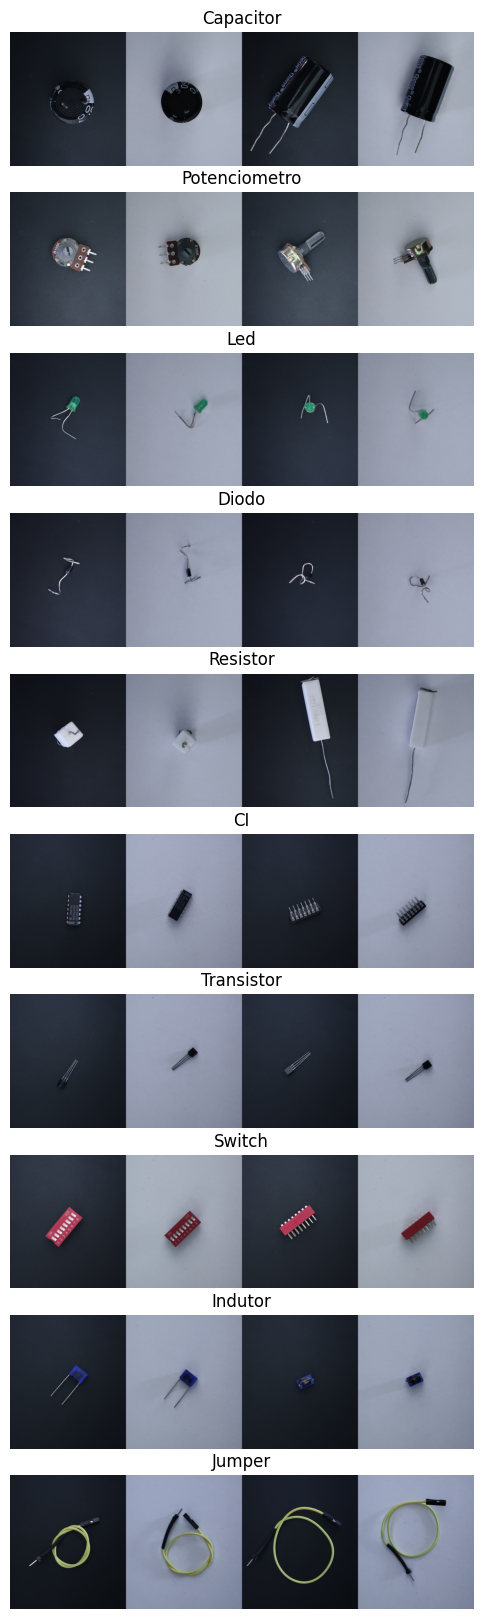

In [35]:
fig, axes = pl.subplots(10, 1, figsize=(40.96,20.48))

ordem = [mont_capacitores, mont_pot, mont_led, mont_diodo, mont_resistores, mont_ic, mont_transist, mont_switch, mont_indutor, mont_jump]
nomes = ['Capacitor', 'Potenciometro', 'Led', 'Diodo', 'Resistor', 'CI', 'Transistor', 'Switch', 'Indutor', 'Jumper']
for i, mont in zip(range(0,10), ordem):
  axes[i].imshow(mont)
  axes[i].set_axis_off()
  axes[i].set_title(nomes[i])


# Exibir metadados

In [3]:
from ast import Pass
import json


def imprimir(item):
  if isinstance(item, list):
    while len(item) != 0:
      imprimir(item[0])
      item.pop(0)
  elif isinstance(item, dict):
    chaves = item.keys()
    for chave in chaves:
      print(chave + ' : ', end='')
      imprimir(item[chave])
  elif isinstance(item, str):
    print(item)

def exibir_metadados():
  with open (path_root.joinpath(pathlib.Path('metadata.json'))) as arquivo:
    md = json.load(arquivo)
    for item in md:
      print(item.upper() + ':')
      imprimir(md[item])
      print('\n' + '--'*10 + '\n')

exibir_metadados()

AUTORES:
Augusto Miguel Barth
FÃ¡bio Bays de Araujo
Rian Augusto Heck
Mateus JosÃ© Zardo

--------------------

DESCRICAO:
Base de dados de imagens de alguns componentes eletrÃ´nicos.

--------------------

RESOLUCAO_IMAGENS:
largura : 1300
altura : 1500

--------------------

NUM_CLASSES:
10

--------------------

CLASSES:
id : 0
nome : capacitor
id : 1
nome : potentiometer
id : 2
nome : led
id : 3
nome : diode
id : 4
nome : resistor
id : 5
nome : integrated_circuit
id : 6
nome : transistor
id : 7
nome : switch
id : 8
nome : inductor
id : 9
nome : jumper

--------------------

ESPECIFICAÃ§ÃΜES CÃ¢MERA:
Velocidade ISO : DistÃ¢ncia focal : 5mm
Abertura mÃ¡xima : Brilho : Tempo de exposiÃ§Ã£o : 1/14s
Escala de nÃºmero F : f/1.8

--------------------



Carregando bounding boxes (fonte: https://christianjmills.com/posts/torchvision-cvat-annotation-tutorials/bounding-boxes/)

In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd

def parse_cvat_bbox_xml(xml_content):

    # Parse the XML content
    root = ET.fromstring(xml_content)
    data = {}

    # Iterate through each image element in the XML
    for image in root.findall('image'):
        # Extract image attributes
        image_id = image.get('id')
        image_name = image.get('name')
        width = image.get('width')
        height = image.get('height')

        # Initialize a dictionary to store image data
        image_data = {
            'Image ID': int(image_id),
            'Image Name': image_name,
            'Width': int(width),
            'Height': int(height),
            'Boxes': []
        }

        # Iterate through each bounding box element within the image
        for box in image.findall('box'):
            # Extract box attributes
            label = box.get('label')
            xtl = float(box.get('xtl'))
            ytl = float(box.get('ytl'))
            xbr = float(box.get('xbr'))
            ybr = float(box.get('ybr'))

            # Construct a dictionary for the box data
            box_data = {
                'Label': label,
                'xtl': xtl,
                'ytl': ytl,
                'xbr': xbr,
                'ybr': ybr
            }

            # Append the box data to the image's 'Boxes' list
            image_data['Boxes'].append(box_data)

        # Map the image data to its ID in the data dictionary
        data[image_id] = image_data

    # Convert the data dictionary to a DataFrame and return
    return pd.DataFrame.from_dict(data, orient='index')

# Read the XML file
with open('annotations.xml', 'r', encoding='utf-8') as file:
    xml_content = file.read()

# Parse the XML content
annotation_df = parse_cvat_bbox_xml(xml_content)

annotation_df.head()

,Image ID,Image Name,Width,Height,Boxes
0,0,imagens/capacitor/00-01-v1-B.png,1000,1200,"[{'Label': 'capacitor', 'xtl': 365.4, 'ytl': 4..."
1,1,imagens/capacitor/00-01-v1-W.png,1000,1200,"[{'Label': 'capacitor', 'xtl': 329.42, 'ytl': ..."
2,2,imagens/capacitor/00-01-v2-B.png,1000,1200,"[{'Label': 'capacitor', 'xtl': 306.4, 'ytl': 1..."
3,3,imagens/capacitor/00-01-v2-W.png,1000,1200,"[{'Label': 'capacitor', 'xtl': 282.09, 'ytl': ..."
4,4,imagens/led/01-01-v1-B.png,1000,1200,"[{'Label': 'led', 'xtl': 352.45, 'ytl': 302.09..."
